Text(0.05, 0.85, '$T = 2.00$')

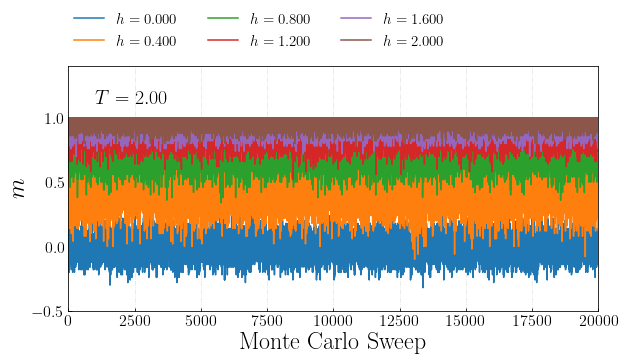

In [193]:
import numpy, os, sys, scipy
from mc import NUM_SPIN, NUM_STEP, NUM_FIELD

sys.path.append("./src/")

import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy.interpolate import UnivariateSpline

params = {
        "text.usetex":     True,
        "font.family":     "serif",
        "font.size":       20,
        "axes.titlesize":  30,
        "axes.labelsize":  24,
        "axes.grid":       True,
        "grid.color":      "#b0b0b0",  # grid color
        "grid.linestyle":  "-.",          # solid
        "grid.linewidth":  0.8,        # in points
        "grid.alpha":      0.3,        # transparency, between 0.0 and 1.0
        "legend.fontsize": 16,
        "xtick.labelsize": 16,
        "ytick.labelsize": 16,
        "figure.subplot.wspace":0.0,
        "figure.subplot.hspace":0.0,
        "axes.spines.right":True,
        "axes.spines.top":True,
        "xtick.direction":'in',
        "ytick.direction":'in'
}

mpl.rcParams.update(params)

def plot_steps(data_path, ax, plot_args = {}):
    data = numpy.loadtxt(data_path, delimiter = ", ")
    step = numpy.arange(data.shape[1])
    h    = numpy.linspace(-2.0, 2.0, data.shape[0])

    for i, ih in enumerate([25, 30, 35, 40, 45, 50]):
        label = r"$h = {:.3f}$".format(h[ih])
        ax.plot(step, data[ih] / NUM_SPIN, label = label, **plot_args)

    ax.legend(loc=(0.0, 1.05), fancybox=False, framealpha=1.0,
              edgecolor='silver', frameon=False, fontsize=15, ncol=3)

fig, ax = plt.subplots(1, 1, figsize=(9.5, 4.5))
plot_steps("./data/ising_1d_h_2.0000.csv", ax)
ax.set_xlim(0, NUM_STEP)
ax.set_ylim(-0.5, 1.40)
ax.set_xlabel("Monte Carlo Sweep")
ax.set_ylabel(r"$m$")
ax.text(0.05, 0.85, r"$T = %4.2f$"%(2.00), transform=ax.transAxes, fontsize=20)

Text(0, 0.5, 'Magnetization $\\langle m \\rangle$')

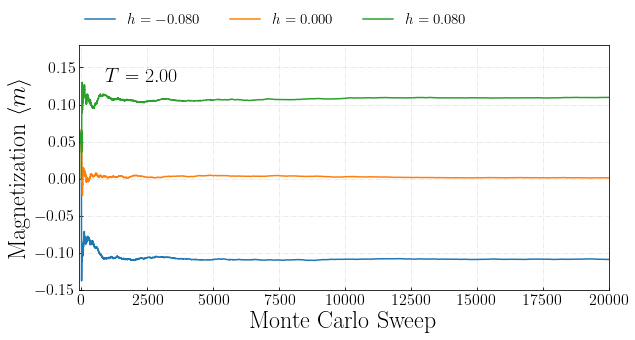

In [194]:
def plot_steps(data_path, ax, ih=25, plot_args = {}):
    data = numpy.loadtxt(data_path, delimiter = ", ")
    step = numpy.arange(data.shape[1])
    h    = numpy.linspace(-2.0, 2.0, data.shape[0])

    label = r"$h = {:.3f}$".format(h[ih])
    m = [1/(x+1) * numpy.sum(data[ih, :x])/100 for x in range(NUM_STEP)]
    ax.plot(step, m, label = label, **plot_args)

    ax.legend(loc=(0.0, 1.05), fancybox=False, framealpha=1.0,
              edgecolor='silver', frameon=False, fontsize=15, ncol=3)
    ax.set_xlim(-100, NUM_STEP)

fig, ax = plt.subplots(1, 1, figsize=(9.5, 4.5))
plot_steps("./data/ising_1d_h_2.0000.csv", ax, ih=24)
plot_steps("./data/ising_1d_h_2.0000.csv", ax, ih=25)
plot_steps("./data/ising_1d_h_2.0000.csv", ax, ih=26)
ax.set_ylim(-0.15, 0.18)
ax.text(0.05, 0.85, r"$T = %4.2f$"%(2.00), transform=ax.transAxes, fontsize=20)
ax.set_xlabel(r"Monte Carlo Sweep")
ax.set_ylabel(r"Magnetization $\langle m \rangle$")


Text(0, 0.5, 'Magnetization $\\langle m \\rangle$')

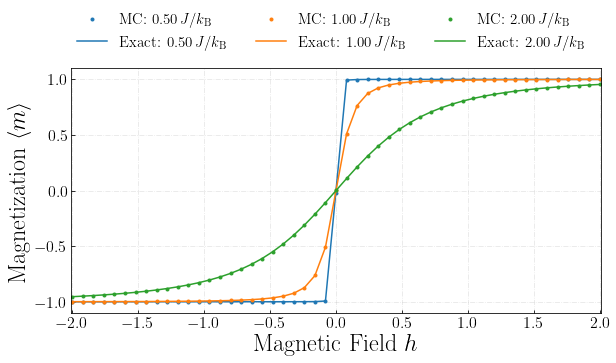

In [195]:
def plot_h_m(t, ax, color="tab:blue"):
    beta = 1.0 / t
    data_path = f"./data/ising_1d_h_{t:.4f}.csv"
    data = numpy.loadtxt(data_path, delimiter = ", ")
    h    = numpy.linspace(-2.0, 2.0, data.shape[0])

    label = r"MC: $ %.2f \, J / k_{\mathrm{B}}$"%(t)
    m1 = numpy.array([numpy.sum(data[ih, :])/NUM_SPIN/NUM_STEP for ih in range(NUM_FIELD)])
    ax.plot(h, m1, label = label, linestyle = "None", marker = "o", markersize = 3, color=color)

    label = r"Exact: $%.2f \, J / k_{\mathrm{B}}$"%(t)
    m2 = numpy.sinh(beta*h)/numpy.sqrt(numpy.sinh(beta*h)**2 + numpy.exp(-4.0*beta))
    ax.plot(h, m2, label = label, color=color)

    ax.set_xlim(-2.01, 2.01)
    ax.set_ylim(-1.1, 1.1)
    ax.legend(loc=(0.0, 1.05), fancybox=False, framealpha=1.0,
              edgecolor='silver', frameon=False, fontsize=15, ncol=3)

fig, ax = plt.subplots(1, 1, figsize=(9.5, 4.5))
plot_h_m(0.5, ax, color="tab:blue")
plot_h_m(1.0, ax, color="tab:orange")
plot_h_m(2.0, ax, color="tab:green")
ax.set_xlabel(r"Magnetic Field $h$")
ax.set_ylabel(r"Magnetization $\langle m \rangle$")